**Draw Boxes on a image**

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from xml_parser import XmlParser
import glob
import pandas as pd
from target_preparation import get_parse
import cv2

In [2]:
f = glob.glob('./BCCD-RBC-WBC-differentiation/Annotations/*.xml')

In [3]:
file_num = []
for elem in f:
    file_num.append(float(elem[-7:-4]))
file_num = np.array(file_num)

In [4]:
x = np.linspace(0, len(file_num)-1, len(file_num))

In [5]:
len(file_num)

364

In [ ]:
fpath = './BCCD-RBC-WBC-differentiation/Annotations/BloodImage_00410.xml'
parser_test = XmlParser()
print(parser_test.get_fname(fpath))
print(parser_test.get_width(fpath))
print(parser_test.get_height(fpath))
print(parser_test.get_labels(fpath))
print(parser_test.get_boxes(fpath))

In [2]:
def check_label(num_str):
    ann_fname = './BCCD-RBC-WBC-differentiation/Annotations/BloodImage_00' + num_str + '.xml'
    img_fname = './BCCD-RBC-WBC-differentiation/JPEGImages/BloodImage_00' + num_str + '.jpg'
    img = Image.open(img_fname)
    img = img.resize((416, 416))
    filename, labels, boxes = get_parse(ann_fname, 416)

    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for i in range(len(boxes)):
        temp_x = boxes[i][0]
        temp_y = boxes[i][2]
        temp_width = boxes[i][1] - boxes[i][0]
        temp_height = boxes[i][3] - boxes[i][2]
        temp_rect = patches.Rectangle((temp_x, temp_y), temp_width, temp_height, 
                                      edgecolor='r', facecolor = 'none')

        plt.text(temp_x, temp_y, labels[i])
        ax.add_patch(temp_rect)

    plt.show()

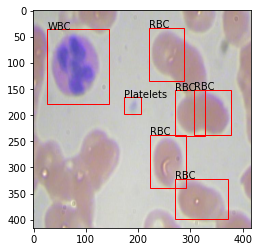

In [6]:
check_label('143')

**Find Appropriate Anchors**

In [ ]:
total_df = pd.DataFrame()
for ann_file in glob.glob('./BCCD-RBC-WBC-differentiation/Annotations/*.xml'):
    filename, labels, boxes = get_parse(ann_file, 416)
    widths = boxes[:,1] - boxes[:,0]
    heights = boxes[:,3] - boxes[:,2]
    file_df = pd.DataFrame()
    file_df['filename'] = np.array([filename for i in range(len(labels))])
    file_df['label'] = labels
    file_df['width'] = widths
    file_df['height'] = heights
    total_df = pd.concat([total_df, file_df])

In [ ]:
print(total_df.shape)

In [ ]:
wbc_dims = total_df.loc[total_df.label == 'WBC']
print(' max width:', round(wbc_dims.width.max()), 
      'mean width:', round(wbc_dims.width.mean()),
      ' min width:', round(wbc_dims.width.min()))
print()
print(' max height:', round(wbc_dims.height.max()), 
      'mean height:', round(wbc_dims.height.mean()),
      ' min height:', round(wbc_dims.height.min()))

In [ ]:
rbc_dims = total_df.loc[total_df.label == 'RBC']
print(' max width:', round(rbc_dims.width.max()), 
      'mean width:', round(rbc_dims.width.mean()),
      ' min width:', round(rbc_dims.width.min()))
print()
print(' max height:', round(rbc_dims.height.max()), 
      'mean height:', round(rbc_dims.height.mean()),
      ' min height:', round(rbc_dims.height.min()))

In [ ]:
platelet_dims = total_df.loc[total_df.label == 'Platelets']
print(' max width:', round(platelet_dims.width.max()), 
      'mean width:', round(platelet_dims.width.mean()),
      ' min width:', round(platelet_dims.width.min()))
print()
print(' max height:', round(platelet_dims.height.max()), 
      'mean height:', round(platelet_dims.height.mean()),
      ' min height:', round(platelet_dims.height.min()))
